In [54]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier, DummyRegressor
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    silhouette_score
)
from sklearn.cluster import KMeans

# **Cross-Validating Models**

In [55]:
# Load digits dataset
digits = datasets.load_digits()

# Create features matrix
features = digits.data

# Create target vector
target = digits.target

# Create standardizer
standardizer = StandardScaler()

# Create logistic regression object
logit = LogisticRegression()

# Create a pipeline that standardizes, then runs logistic regression
pipeline = make_pipeline(standardizer, logit)

# Create k-Fold cross-validation
kf = KFold(n_splits = 10 , shuffle=True, random_state=1)

# Conduct k-fold cross-validation
cv_results = cross_val_score(
    pipeline,
    features,
    target,
    cv=kf,
    scoring="accuracy",
    n_jobs=-1
)

# Calculate mean
cv_results.mean()

np.float64(0.9699472377405337)

In [56]:
cv_results

array([0.97777778, 0.98888889, 0.96111111, 0.94444444, 0.97777778,
       0.98888889, 0.95555556, 0.98882682, 0.97765363, 0.93854749])

# **Creating a Baseline Regression/Classification Model**

In [57]:
# Load data
california = datasets.fetch_california_housing()

# Create features and target
features, target = california.data, california.target

# Make train-test split
features_train, features_test, target_train, target_test = train_test_split(
    features, target, random_state=0)

# Create and train dummy regressor
dummy = DummyRegressor(strategy="mean")
dummy.fit(features_train, target_train)

# Evaluate model
dummy.score(features_test, target_test)

-0.0004092193772518016

In [58]:
# Train simple linear regression model
ols = LinearRegression()
ols.fit(features_train, target_train)

# Get R-squared score
ols.score(features_test, target_test)

0.5911695436410476



---



In [59]:
# Load data
iris = datasets.load_iris()

# Create target vector and feature matrix
features, target = iris.data, iris.target

# Split into training and test set
features_train, features_test, target_train, target_test = train_test_split(
    features, target, random_state=0)

# Create dummy classifier
dummy = DummyClassifier(strategy='uniform', random_state=1)
dummy.fit(features_train, target_train)

# Get accuracy score
dummy.score(features_test, target_test)

0.42105263157894735

In [60]:
# Create classifier
classifier = RandomForestClassifier()

# Train model
classifier.fit(features_train, target_train)

# Get accuracy score
classifier.score(features_test, target_test)

0.9736842105263158

| Strategy        | Classifier | Regressor | Description                                                                             | Notes / Use Case                        |
| --------------- | ---------- | --------- | --------------------------------------------------------------------------------------- | --------------------------------------- |
| `most_frequent` | ✅          | ❌         | Predicts the most frequent class label                                                  | Good baseline for imbalanced classes    |
| `stratified`    | ✅          | ❌         | Predicts according to training class distribution (random sampling)                     | Sanity check for classification         |
| `uniform`       | ✅          | ❌         | Predicts classes uniformly at random                                                    | Random baseline                         |
| `prior`         | ✅          | ❌         | Predicts based on class prior probabilities                                             | Same as `most_frequent`, supports probs |
| `mean`          | ❌          | ✅         | Predicts the mean of the training target values                                         | Simple regression baseline              |
| `median`        | ❌          | ✅         | Predicts the median of the training target values                                       | Better when outliers are present        |
| `quantile`      | ❌          | ✅         | Predicts a specific quantile of the target distribution (e.g., 0.9 for 90th percentile) | Use for skewed data or risk assessments |
| `constant`      | ✅          | ✅         | Predicts a user-defined constant value                                                  | Controlled output; requires parameter   |


why use dummy ?

- To create a baseline so you can **compare your real model’s performance**.

- Helps you check if your model is **actually** learning something useful.

- If your model performs **worse than** DummyRegressor, it's not doing better than guessing.

# **Evaluating Binary Classifier Predictions**

In [61]:
# Generate features matrix and target vector
X, y = datasets.make_classification(n_samples = 10000,
                                    n_features = 3,
                                    n_informative = 3,
                                    n_redundant = 0,
                                    n_classes = 2,
                                    random_state = 1)

# Create logistic regression
logit = LogisticRegression()

- Accuracy is a common performance metric. It is simply the proportion of observations
predicted correctly :
$$
\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}
$$


In [62]:
# Cross-validate model using accuracy
cross_val_score(logit, X, y, scoring="accuracy")

array([0.9555, 0.95  , 0.9585, 0.9555, 0.956 ])

- Models
with high precision are pessimistic in that they only predict an observation is of the
positive class when they are very certain about it. Formally, precision is:

$$
\text{Precision} = \frac{TP}{TP + FP}
$$


In [63]:
# Cross-validate model using precision
cross_val_score(logit, X, y, scoring="precision")

array([0.95963673, 0.94820717, 0.9635996 , 0.96149949, 0.96060606])

- Models
 with high recall are optimistic in that they have a low bar for predicting that an observation
is in the positive class:

$$
\text{Recall} = \frac{TP}{TP + FN}
$$


In [64]:
# Cross-validate model using recall
cross_val_score(logit, X, y, scoring="recall")

array([0.951, 0.952, 0.953, 0.949, 0.951])

- The F1
score is the harmonic mean (a kind of average used for ratios):

$$
F_1 = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}
$$


In [65]:
# Cross-validate model using f1
cross_val_score(logit, X, y, scoring="f1")

array([0.95529884, 0.9500998 , 0.95827049, 0.95520886, 0.95577889])

In [66]:
# cross_val_score(logit, X, y, scoring='f1_macro') for multiclass target

# **Visualizing a Classifier’s Performance**

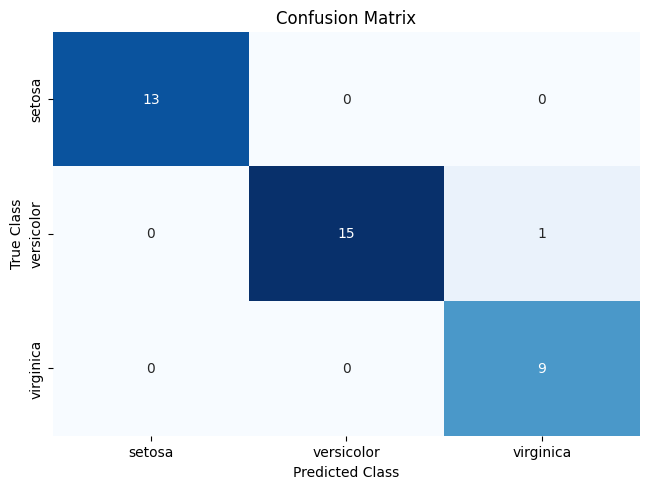

In [67]:
# Load data
iris = datasets.load_iris()

# Create feature matrix
features = iris.data

# Create target vector
target = iris.target

# Create list of target class names
class_names = iris.target_names

# Create training and test set
features_train, features_test, target_train, target_test = train_test_split(
features, target, random_state=1)

# Create logistic regression
classifier = LogisticRegression()

# Train model and make predictions
target_predicted = classifier.fit(features_train,
                                  target_train).predict(features_test)

# Create confusion matrix
matrix = confusion_matrix(target_test, target_predicted)

# Create pandas dataframe
dataframe = pd.DataFrame(matrix, index=class_names, columns=class_names)

# Create heatmap
sns.heatmap(dataframe, annot=True, cbar=None, cmap="Blues")
plt.title("Confusion Matrix"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

# **Evaluating Regression Models**

In [68]:
# Generate features matrix, target vector
features, target = datasets.make_regression(n_samples = 100,
                                   n_features = 3,
                                   n_informative = 3,
                                   n_targets = 1,
                                   noise = 50,
                                   coef = False,
                                   random_state = 1)

# Create a linear regression object
ols = LinearRegression()

$$
\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$


In [69]:
# Cross-validate the linear regression using (negative) MSE
cross_val_score(ols, features, target, scoring='neg_mean_squared_error')

array([-1974.65337976, -2004.54137625, -3935.19355723, -1060.04361386,
       -1598.74104702])

$$
R^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}
$$


In [70]:
# Cross-validate the linear regression using R-squared
cross_val_score(ols, features, target, scoring='r2')

array([0.8622399 , 0.85838075, 0.74723548, 0.91354743, 0.84469331])

$$
\begin{aligned}
&\text{Where:} \\
&y_i \quad \text{is the true value} \\
&\hat{y}_i \quad \text{is the predicted value} \\
&\bar{y} \quad \text{is the mean of the true values} \\
&n \quad \text{is the number of samples}
\end{aligned}
$$


# **Evaluating Clustering Models**

In [71]:
# Generate feature matrix
features, _ = datasets.make_blobs(n_samples = 1000,
                         n_features = 10,
                         centers = 2,
                         cluster_std = 0.5,
                         shuffle = True,
                         random_state = 1)

# Cluster data using k-means to predict classes
model = KMeans(n_clusters=2, random_state=1).fit(features)

# Get predicted classes
target_predicted = model.labels_

# Evaluate model
silhouette_score(features, target_predicted)

np.float64(0.8916265564072141)

$$
s_i = \frac{b_i - a_i}{\max(a_i, b_i)}
$$


| Score Range     | Interpretation                                                                    |
| --------------- | --------------------------------------------------------------------------------- |
| $s_i \approx 1$ | **Excellent**: the point is well matched to its own cluster and far from others |
| $s_i \approx 0$ | **Okay/Borderline**: the point lies on or near the decision boundary           |
| $s_i < 0$       | **Bad**: the point may have been assigned to the wrong cluster                  |


# **Creating a Text Report of Evaluation Metrics**

In [72]:
# Load data
iris = datasets.load_iris()

# Create feature matrix
features = iris.data

# Create target vector
target = iris.target

# Create list of target class names
class_names = iris.target_names

# Create training and test set
features_train, features_test, target_train, target_test = train_test_split(
    features, target, random_state=1)

# Create logistic regression
classifier = LogisticRegression()

# Train model and make predictions
model = classifier.fit(features_train, target_train)
target_predicted = model.predict(features_test)

# Create a classification report
print(classification_report(target_test,
                            target_predicted,
                            target_names=class_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       1.00      0.94      0.97        16
   virginica       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38

